# **import necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import string
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **load dataset**

In [ ]:
df=pd.read_csv('/content/spam.csv')
df

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [ ]:
df.shape

(5572, 2)

# **Data Exploration**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30

In [ ]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(415)

In [ ]:
df["spam"] = df["Category"].replace(to_replace=["ham", "spam"], value=[0,1])
df

Category                                            Message  spam
0         ham  Go until jurong point, crazy.. Available only ...     0
1         ham                      Ok lar... Joking wif u oni...     0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3         ham  U dun say so early hor... U c already then say...     0
4         ham  Nah I don't think he goes to usf, he lives aro...     0
...       ...                                                ...   ...
5567     spam  This is the 2nd time we have tried 2 contact u...     1
5568      ham               Will ü b going to esplanade fr home?     0
5569      ham  Pity, * was in mood for that. So...any other s...     0
5570      ham  The guy did some bitching but I acted like i'd...     0
5571      ham                         Rofl. Its true to its name     0

[5572 rows x 3 columns]

<Axes: xlabel='Category', ylabel='count'>

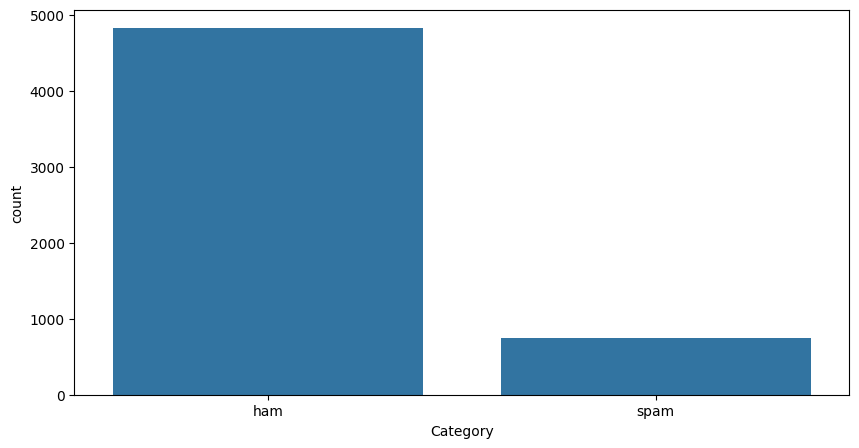

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=df)

In [ ]:
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

Category                                            Message  spam
0         ham  Go until jurong point, crazy.. Available only ...     0
1         ham                      Ok lar... Joking wif u oni...     0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3         ham  U dun say so early hor... U c already then say...     0
4         ham  Nah I don't think he goes to usf, he lives aro...     0
...       ...                                                ...   ...
5567     spam  This is the 2nd time we have tried 2 contact u...     1
5568      ham               Will ü b going to esplanade fr home?     0
5569      ham  Pity, * was in mood for that. So...any other s...     0
5570      ham  The guy did some bitching but I acted like i'd...     0
5571      ham                         Rofl. Its true to its name     0

[5572 rows x 3 columns]

# **Preprocessing**

In [ ]:
stemmer = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

corpus = []
for msg in df['Message'].astype(str):
    text = msg.lower()
    text = text.translate(str.maketrans('', '', string.punctuation)).split()
    text = [stemmer.stem(w) for w in text if w not in stopwords_set]
    corpus.append(" ".join(text))

# **Model Creation**


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# **Encoding**

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['Category'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(x_train, y_train)

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
model.score(x_train,y_train)

0.9939421135292797

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.90      0.94      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

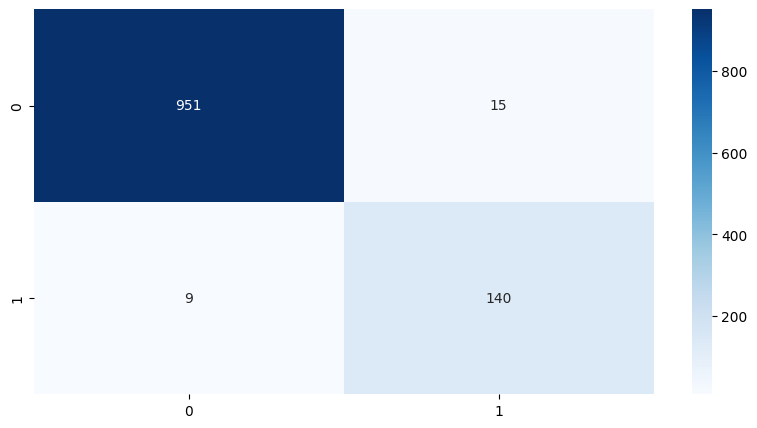

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')

# **LogisticRegression**

In [ ]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
Lr.score(x_train,y_train)

0.9948395781916087

In [ ]:
Lr.score(x_test,y_test)

0.9829596412556054

In [ ]:
y_pred=Lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# **Support vector machine**

In [ ]:
svc_c = SVC(kernel='linear')
svc_c.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
svc_c.score(x_train,y_train)

0.9997756338344178

In [ ]:
y_pred=svc_c.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# **Saving model**

In [ ]:
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("naive_bayes_model.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))
